In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

# let's load the data in now
df = pd.read_csv("../data/sample_demo_weather_data_1981.csv")

# let's reshape our data and just include the known good values
df = df[df['raintot']>=0]

# Saving dataframes back to _something_

To save your data back to CSV, there are some useful functions to know about ... we will talk about :

    [dataframe].to_csv()
    [dataframe].to_html()
    
You can learn more about others [here](http://pandas.pydata.org/pandas-docs/version/0.18.0/io.html#io-tools-text-csv-hdf5).

## to_csv()
Let's save the file back to a csv ... 
    

In [3]:
df.to_csv("./sample_demo_weather_data_1981_clean.csv")

## to_html()
In a similar fashion to `to_csv` we can actually save the data down to html in the event you'd like to maybe put it in a webpage or for some other application:

In [4]:
df.to_html("./sample_demo_weather_data_1981_clean.html")

# Grouping/Aggregating data

Now let's say we wanted to group data in a specific way, for now, let's try to think about our data **by columns**.  One natural way to do this with the data we have is to group by month.

The first tool we have is `[Dataframe].groupby()` and with it, we give it a column and get a grouping.  So say we want to group by month, we'd use something like:

In [5]:
monthly_data = df.groupby('month')

Now that we have the groups we need to _do_ something with the groups, so maybe we'd like the monthly `raintot` ans `tmaxavg` averages with `mean()`.  Let's try:

In [6]:
monthly_data.mean()[['raintot', 'tmaxavg']]

,raintot,tmaxavg
month,,
1,74.047619,17.344414
2,83.857143,17.346586
3,76.727273,15.884773
4,121.760563,19.278508
5,173.692308,21.880372
6,47.644860,24.802031
7,26.715517,27.560647
8,6.723404,31.697030
9,2.152381,33.013071


## Descriptive stats on aggregates ... a deviation

We haven't yet talked about multi-level indices, but now is the time to get started.  Now that we have a little understanding (very little) of aggregation, let's take a little look at what it all means, by a concrete exploration.

When we aggregated by month and then applied some _aggregation operation_ (for now let's stick with we know), we were able to see a much different picture of the data.  We could ask the question about a _grouping_ of the data and then start to make inferences about that.

As it turns out, when we do aggregation we're getting a Dataframe-like thing back, but that Dataframe-like thing now has dimension.  Let's see what happens when we run `describe()` on our aggregation.

In [7]:
monthly_data.describe()

day        lat         lon     raintot    tmaxavg    year
month                                                                       
1     count  21.000000  21.000000   21.000000   21.000000  21.000000    21.0
      mean   14.714286  37.135086 -120.265381   74.047619  17.344414  1981.0
      std     8.289408   2.129368    2.290882   73.646097   3.930542     0.0
      min     1.000000  33.459400 -122.921000    0.000000  14.359200  1981.0
      25%     8.000000  35.521100 -121.491000   16.000000  14.535200  1981.0
      50%    15.000000  38.380100 -121.375000   63.000000  15.816900  1981.0
      75%    22.000000  38.540300 -119.323000  115.000000  18.211300  1981.0
      max    29.000000  40.573400 -116.087000  252.000000  25.415500  1981.0
2     count  14.000000  14.000000   14.000000   14.000000  14.000000    14.0
      mean   15.428571  35.679700 -119.647357   83.857143  17.346586  1981.0
      std     7.143736   2.334435    2.043628   79.583393   2.848617     0.0
      min     5.000000  32.999200 -122.686000   13.000000  12.894400  1981.0
      25%    11.250000  33.755100 -121.598250   28.000000  14.521150  1981.0
      50%    18.000000  34.658900 -118.852000   44.500000  18.010550  1981.0
      75%    19.750000  37.954975 -117.914500  126.250000  19.809875  1981.0
      max    26.000000  38.989900 -117.207000  259.000000  20.760600  1981.0
3     count  11.000000  11.000000   11.000000   11.000000  11.000000    11.0
      mean   13.090909  37.452982 -120.976818   76.727273  15.884773  1981.0
      std     8.870790   1.345112    1.023257   80.982826   0.844266     0.0
      min     4.000000  35.883300 -122.601000   14.000000  13.753500  1981.0
      25%     5.000000  36.760550 -121.790500   20.000000  15.746500  1981.0
      50%    11.000000  36.847100 -120.567000   61.000000  15.795800  1981.0
      75%    19.000000  38.030300 -120.181500   90.000000  16.359150  1981.0
      max    26.000000  40.445800 -119.483000  274.000000  16.993000  1981.0
4     count  71.000000  71.000000   71.000000   71.000000  71.000000    71.0
      mean   18.577465  37.503323 -120.820113  121.760563  19.278508  1981.0
      std     8.366023   1.976917    1.437721   44.071521   1.285237     0.0
      min     2.000000  33.878100 -122.613000   33.000000  15.288700  1981.0
      25%    15.000000  36.235700 -121.774500   93.500000  18.288700  1981.0
      50%    16.000000  38.246200 -121.502000  127.000000  19.154900  1981.0
...                ...        ...         ...         ...        ...     ...
9     std     7.205538   1.997030    1.748508    5.045525   3.934491     0.0
      min     1.000000  33.511100 -122.921000    0.000000  23.422500  1981.0
      25%    10.000000  34.236900 -121.597000    0.000000  31.443700  1981.0
      50%    17.000000  36.847100 -119.838000    0.000000  33.676100  1981.0
      75%    22.000000  37.990700 -118.594000    2.000000  35.528200  1981.0
      max    30.000000  40.555200 -115.973000   28.000000  41.774600  1981.0
10    count  87.000000  87.000000   87.000000   87.000000  87.000000    87.0
      mean   13.563218  36.520614 -119.859575    1.505747  31.437915  1981.0
      std     9.136817   2.152949    1.910189    4.100124   4.181664     0.0
      min     1.000000  32.569200 -122.920000    0.000000  17.633800  1981.0
      25%     7.000000  34.045450 -121.654000    0.000000  29.496500  1981.0
      50%    14.000000  36.736700 -119.724000    0.000000  31.718300  1981.0
      75%    21.500000  38.006650 -118.286500    0.000000  34.158450  1981.0
      max    30.000000  40.587500 -116.078000   20.000000  41.042300  1981.0
11    count  19.000000  19.000000   19.000000   19.000000  19.000000    19.0
      mean   14.789474  37.143363 -120.688421    0.263158  27.265011  1981.0
      std     8.772298   1.941732    1.512029    1.147079   2.032388     0.0
      min     4.000000  33.935600 -122.202000    0.000000  23.816900  1981.0
      25%     5.000000  36.166750 -121.723000    0.000000  26.003550  1981.0
      50%    12

WHOA!

That's awesome ... 

What are we looking at?  We have now added a "level" to our row data ... where the outer row (index = 0) is the month.  The inner row (index = 1) are the stats that `describe` is guaranteeing, and the columns (index=2) are as we expect them ... the `mean()` of that inner row aggregated over the outer row.

This is what is called a _multi-level index_.

There are a lot of ways to get at these multiple levels, but let's first understand what questions we might like to ask of the data we have.

## Some basic inquiries ...

What if we wanted to know :

* What are the bounding boxes for each month?  Why would this be interesting?
* How did the mean and median 50%-tile vary from month to month?  What could this tell us?
* Do the data measurement counts correlate to the averages for `raintot` and `tmaxavg`?  

Let's dig in ...

### Understanding  MultiIndex

When we look at the `describe()` output for `monthly_data` we notice there are multiple levels on the rows -- that is there is a `month` then there is the statistical layer which includes `mean`, `min`, `max`, etc.  This is called a hierarchical index -- that is the inner levels of the columns constrain the outer one's like a hieararchy.  This, it turns out, is very useful in a number of applications later, but when we do _grouping_ in the way we've done it here, we're seeing it in action concretely.

Now exactly how do we get at this data to being to answer some of our questions above.

Buckle it, it is going to get a little tricky ...

First let's introduce _location_ or _label-based_ indexing with `[Dataframe].loc`.

### `.loc`
So let's say we want to get the data in a non-hierarchical Dataframe.  Let's go back to our raw data first and use `.loc` to get familiar with how it works.

The first form we'll work with is 

    .loc[<row label name>,<column label name>]

In [8]:
df.loc[1,'year']

1981.0

In [9]:
df['year'][1] # this is equivalent

1981

The next for is to pass in a list of the rows we want (by name/label) and in this case they are numeric.

    .loc[[<list of rows>],<column>]

In [10]:
df.loc[[1,3,4,10,100],'month']

1      1.0
3      NaN
4      1.0
10     1.0
100    4.0
Name: month, dtype: float64

In [11]:
df['month'][[1,2,3,10,100]]  # also equivalent

1      1.0
2      1.0
3      NaN
10     1.0
100    4.0
Name: month, dtype: float64

So far there isn't much difference in using the syntax we learned before with df[<columns>][<rows>] ... that all changes when we get to MultiIndex.

Going back to our `monthly_data.describe()` Dataframe.  How would we access the hierarchical indices?

### back to .loc

We're going to try this -- what if instead of just the rows and columns, we were able to describe the _levels_ in those rows and columns ... so if you had grouped months and in each group the summary statistics provided by describe() in the next _level_ ... and so on.

The form of `.loc` we'll use is this:

    .loc[([outer_level_row_labels], 
          [next_inner_row_labels], 
          [next_inner_row_labels] ...)
        , [column_labels]]

In [12]:
monthly_data.describe().loc[([1,2,3,4],['min','max']), (['lat','lon'])]

lat      lon
month                      
1     min  33.4594 -122.921
      max  40.5734 -116.087
2     min  32.9992 -122.686
      max  38.9899 -117.207
3     min  35.8833 -122.601
      max  40.4458 -119.483
4     min  33.8781 -122.613
      max  40.4847 -117.903

What if we don't know the labels ... or what them all, or in some other way?  We're going to try to introduce another tool ... and this might be confusing since it can be used to do exactly what we did in the nice tidy syntax above, but stick with us, it might be worth it ...

There is a class that is part of Pandas called `IndexSlice`.  What is does is allow you to specify the "slice" of an index (rows, columns) in a similar fashion as a list slice, but with the levels (hierarchy) specified.

Say you want the first 10 "rows" of the outer slice (months).  If that were a list you'd just say `outer_slice[label:label]`.  Now if you wanted te first two "rows" of the next slice ... `next_slice[label:label]`.

Thus,

In [13]:
monthly_data.describe().loc[pd.IndexSlice[1:10:, ], (['lat','lon'])]

lat         lon
month                              
1     count   21.000000   21.000000
      mean    37.135086 -120.265381
      std      2.129368    2.290882
      min     33.459400 -122.921000
      25%     35.521100 -121.491000
      50%     38.380100 -121.375000
      75%     38.540300 -119.323000
      max     40.573400 -116.087000
2     count   14.000000   14.000000
      mean    35.679700 -119.647357
      std      2.334435    2.043628
      min     32.999200 -122.686000
      25%     33.755100 -121.598250
      50%     34.658900 -118.852000
      75%     37.954975 -117.914500
      max     38.989900 -117.207000
3     count   11.000000   11.000000
      mean    37.452982 -120.976818
      std      1.345112    1.023257
      min     35.883300 -122.601000
      25%     36.760550 -121.790500
      50%     36.847100 -120.567000
      75%     38.030300 -120.181500
      max     40.445800 -119.483000
4     count   71.000000   71.000000
      mean    37.503323 -120.820113
      std      1.976917    1.437721
      min     33.878100 -122.613000
      25%     36.235700 -121.774500
      50%     38.246200 -121.502000
...                 ...         ...
7     std      2.007417    1.870769
      min     33.038700 -122.921000
      25%     35.720225 -121.923000
      50%     37.833150 -121.344500
      75%     38.616700 -119.175000
      max     40.610300 -115.921000
8     count   94.000000   94.000000
      mean    37.452271 -120.814032
      std      1.723578    1.536835
      min     33.660300 -122.710000
      25%     36.792425 -121.813250
      50%     37.898600 -121.511000
      75%     38.658025 -120.148500
      max     39.747500 -116.252000
9     count  105.000000  105.000000
      mean    36.613031 -119.983571
      std      1.997030    1.748508
      min     33.511100 -122.921000
      25%     34.236900 -121.597000
      50%     36.847100 -119.838000
      75%     37.990700 -118.594000
      max     40.555200 -115.973000
10    count   87.000000   87.000000
      mean    36.520614 -119.859575
      std      2.152949    1.910189
      min     32.569200 -122.920000
      25%     34.045450 -121.654000
      50%     36.736700 -119.724000
      75%     38.006650 -118.286500
      max     40.587500 -116.078000

[80 rows x 2 columns]

and ... if we want every other month (1 through 12 skip 2 -- [1:12:2])

In [14]:
monthly_data.describe().loc[pd.IndexSlice[1:12:2, ['min','max']], pd.IndexSlice[['lat','lon']]]

lat      lon
month                      
1     min  33.4594 -122.921
      max  40.5734 -116.087
3     min  35.8833 -122.601
      max  40.4458 -119.483
5     min  33.6497 -122.687
      max  39.3033 -116.179
7     min  33.0387 -122.921
      max  40.6103 -115.921
9     min  33.5111 -122.921
      max  40.5552 -115.973
11    min  33.9356 -122.202
      max  39.5389 -118.065

and even ...

In [15]:
monthly_data.describe().loc[([1,3,5,7,9,11], ['min','max']), pd.IndexSlice[['lat','lon']]]

lat      lon
month                      
1     min  33.4594 -122.921
      max  40.5734 -116.087
3     min  35.8833 -122.601
      max  40.4458 -119.483
5     min  33.6497 -122.687
      max  39.3033 -116.179
7     min  33.0387 -122.921
      max  40.6103 -115.921
9     min  33.5111 -122.921
      max  40.5552 -115.973
11    min  33.9356 -122.202
      max  39.5389 -118.065

In [16]:
monthly_data.describe().loc[pd.IndexSlice[1:12, ['mean','50%']], pd.IndexSlice[['raintot','tmaxavg']]]

raintot    tmaxavg
month                            
1     mean   74.047619  17.344414
      50%    63.000000  15.816900
2     mean   83.857143  17.346586
      50%    44.500000  18.010550
3     mean   76.727273  15.884773
      50%    61.000000  15.795800
4     mean  121.760563  19.278508
      50%   127.000000  19.154900
5     mean  173.692308  21.880372
      50%   155.000000  21.510550
6     mean   47.644860  24.802031
      50%    29.000000  24.612700
7     mean   26.715517  27.560647
      50%    21.000000  27.507050
8     mean    6.723404  31.697030
      50%     6.000000  32.700700
9     mean    2.152381  33.013071
      50%     0.000000  33.676100
10    mean    1.505747  31.437915
      50%     0.000000  31.718300
11    mean    0.263158  27.265011
      50%     0.000000  27.894400
12    mean    1.166667  22.089200
      50%     0.000000  21.746500

In [17]:
monthly_data.describe().loc[pd.IndexSlice[1:12, ['mean','50%','count']], pd.IndexSlice[['raintot','tmaxavg']]]

raintot     tmaxavg
month                              
1     count   21.000000   21.000000
      mean    74.047619   17.344414
      50%     63.000000   15.816900
2     count   14.000000   14.000000
      mean    83.857143   17.346586
      50%     44.500000   18.010550
3     count   11.000000   11.000000
      mean    76.727273   15.884773
      50%     61.000000   15.795800
4     count   71.000000   71.000000
      mean   121.760563   19.278508
      50%    127.000000   19.154900
5     count   78.000000   78.000000
      mean   173.692308   21.880372
      50%    155.000000   21.510550
6     count  107.000000  107.000000
      mean    47.644860   24.802031
      50%     29.000000   24.612700
7     count  116.000000  116.000000
      mean    26.715517   27.560647
      50%     21.000000   27.507050
8     count   94.000000   94.000000
      mean     6.723404   31.697030
      50%      6.000000   32.700700
9     count  105.000000  105.000000
      mean     2.152381   33.013071
      50%      0.000000   33.676100
10    count   87.000000   87.000000
      mean     1.505747   31.437915
      50%      0.000000   31.718300
11    count   19.000000   19.000000
      mean     0.263158   27.265011
      50%      0.000000   27.894400
12    count   12.000000   12.000000
      mean     1.166667   22.089200
      50%      0.000000   21.746500

### One Last tool Multi-index tool ... cross-section ...

Another tool in your tool chest we'll need is what's called _cross-section_ slicing.  This allows us to easily slice a multi-index Dataframe even further.

The basic syntax with the way we'll use it (there are other variants of use) is 

    [dataframe].xs(<column>,level=<level_of_the_column>)
    
Here is an example ...

In [91]:
monthly_data.describe().loc[pd.IndexSlice[1:12,], pd.IndexSlice[['raintot','tmaxavg']]].xs('count',level=1)

,raintot,tmaxavg
month,,
1,21.0,21.0
2,14.0,14.0
3,11.0,11.0
4,71.0,71.0
5,78.0,78.0
6,107.0,107.0
7,116.0,116.0
8,94.0,94.0
9,105.0,105.0


## Basic plotting in Pandas
We now have all the basic tools to slice up Dataframes and get interesting data out.  Now let's work on seeing that data.  All the details on plotting and visualizing can be found [in the documentation here](http://pandas.pydata.org/pandas-docs/stable/visualization.html).


### The basic `plot()`

Let's say you wanted to plot all of your `raintot` data.  We have a simple way of doing that ... we select the dataframe we need and do this:

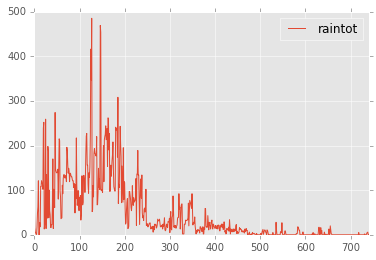

In [112]:
df[['raintot']].plot()

Similarly, we can do this with any variable we like:

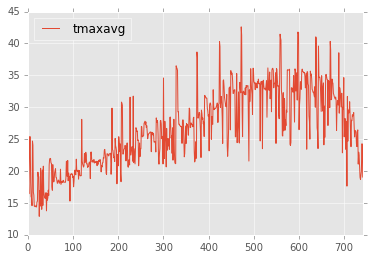

In [113]:
df[['tmaxavg']].plot()

Now putting them together couldn't be easier ... just build the list of stuff you want to show up -- careful with scales, though!

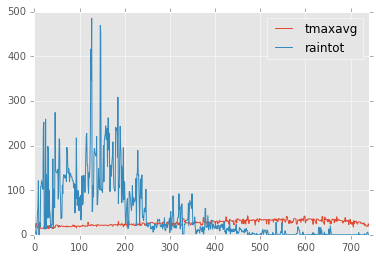

In [114]:
df[['tmaxavg','raintot']].plot()

To handle the scale difference (in this case) our best bet would be to add a secondary y-axis.  Easily done by just passing in the `secondary_y` axis:

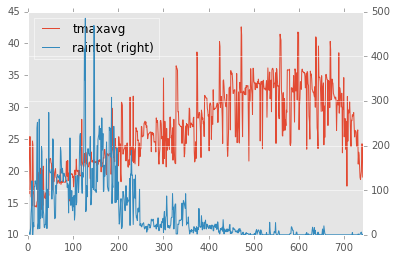

In [115]:
df[['tmaxavg','raintot']].plot(secondary_y=['raintot'])

Yay!

Read the documentation for so many more tricks you can try to get the figure to look the way you want.  And we'll touch in on `matplotlib` for ultimate control of the figure.  What's provided in Pandas covers 60%+ of what you'd ever want to do. 

### Scatterplots

Scatterplots are a basic and fundamental tool for seeing your data.  Support has been cooked into Pandas directly (on top of `matplotlib`) so you don't have to think much about it. 

The basic structure is :

    [Dataframe].plot.scatter(x=<the_x_axis_column_data>, y=<the_y_axis_column_data>)
   
   
Thus, if we wanted to plot the total rainfall by month, we'd get the dataframe with such data and then do something like:

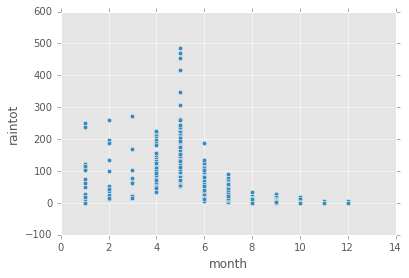

In [98]:
fig = df[['month','raintot','tmaxavg']].plot.scatter(x='month',y='raintot')

### What about saving that pretty figure :

Pandas makes this remarkably easy.  

Just use:

    fig.figure.savefig('saveplot.png', dpi=300)
    
Where `fig` is the plot we stored above.  There are more options that can be passed in, but if you want publication quality output, use `dpi=300` for starters!

In [107]:
fig.figure.savefig('scatterplot.png', dpi=300)
# check your filesystem and make sure this came down

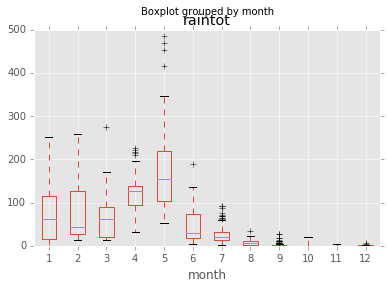

In [108]:
fig = df[['month','raintot','tmaxavg']].boxplot(column='raintot', by='month')

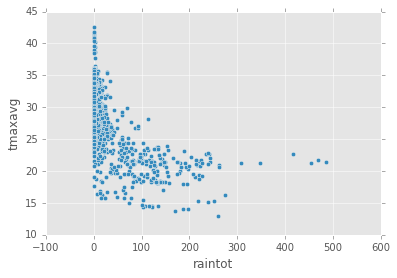

In [116]:
fig = df[['raintot','tmaxavg']].plot.scatter(x='raintot', y='tmaxavg')

In [20]:
monthly_data.describe()[['lat','lon']].ix[:4]#[('ilevel_1',1)]#ix[(1,('lat','lon'))]

lat         lon
month                             
1     count  21.000000   21.000000
      mean   37.135086 -120.265381
      std     2.129368    2.290882
      min    33.459400 -122.921000
      25%    35.521100 -121.491000
      50%    38.380100 -121.375000
      75%    38.540300 -119.323000
      max    40.573400 -116.087000
2     count  14.000000   14.000000
      mean   35.679700 -119.647357
      std     2.334435    2.043628
      min    32.999200 -122.686000
      25%    33.755100 -121.598250
      50%    34.658900 -118.852000
      75%    37.954975 -117.914500
      max    38.989900 -117.207000
3     count  11.000000   11.000000
      mean   37.452982 -120.976818
      std     1.345112    1.023257
      min    35.883300 -122.601000
      25%    36.760550 -121.790500
      50%    36.847100 -120.567000
      75%    38.030300 -120.181500
      max    40.445800 -119.483000
4     count  71.000000   71.000000
      mean   37.503323 -120.820113
      std     1.976917    1.437721
      min    33.878100 -122.613000
      25%    36.235700 -121.774500
      50%    38.246200 -121.502000
      75%    38.840250 -119.520000
      max    40.484700 -117.903000

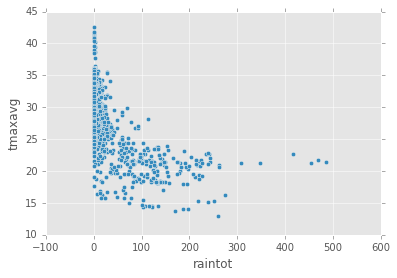

In [21]:
df[['raintot','tmaxavg']].plot.scatter(x='raintot', y='tmaxavg')

In [22]:
from pandas.tools.plotting import lag_plot

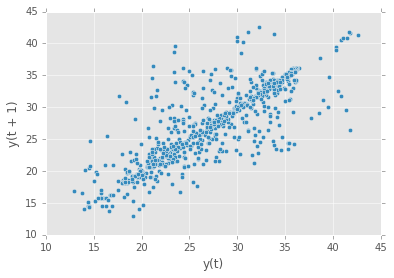

In [23]:
fig = lag_plot(df['tmaxavg'])